based on 
https://github.com/llSourcell/How-to-Predict-Stock-Prices-Easily-Demo
and
http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

I just want to predict if a stock will rise based on previous information

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

Using TensorFlow backend.


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
prices_dataset =  pd.read_csv('../input/prices.csv', header=0)
prices_dataset

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12 00:00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13 00:00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14 00:00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15 00:00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19 00:00:00,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [3]:
wltw = prices_dataset[prices_dataset['symbol']=='WLTW']
wltw.shape

(251, 7)

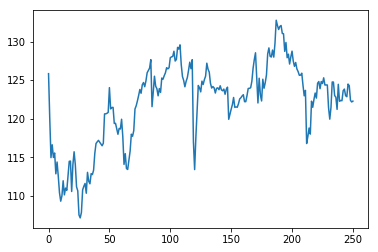

In [4]:
wltw_stock_prices = wltw.close.values.astype('float32')

plt.plot(wltw_stock_prices)
plt.show()

wltw_stock_prices=wltw_stock_prices.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
wltw_stock_prices = scaler.fit_transform(wltw_stock_prices)

In [5]:
train_size = int(len(wltw_stock_prices) * 0.67)
test_size = len(wltw_stock_prices) - train_size
train, test = wltw_stock_prices[0:train_size,:], wltw_stock_prices[train_size:len(wltw_stock_prices),:]
print(len(train), len(test))

168 83


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`


compilation time :  0.019057035446166992


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


In [11]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.10)

/opt/conda/lib/python3.6/site-packages/Keras-2.0.4-py3.6.egg/keras/models.py:847: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 149 samples, validate on 17 samples
Epoch 1/10


128/149 [========================>.....] - ETA: 0s - loss: 0.3143

149/149 [==============================] - 0s - loss: 0.3056 - val_loss: 0.3183


Epoch 2/10
128/149 [========================>.....] - ETA: 0s - loss: 0.2737

149/149 [==============================] - 0s - loss: 0.2691 - val_loss: 0.2863


Epoch 3/10
128/149 [========================>.....] - ETA: 0s - loss: 0.2359

149/149 [==============================] - 0s - loss: 0.2419 - val_loss: 0.2553


Epoch 4/10
128/149 [========================>.....] - ETA: 0s - loss: 0.2129

149/149 [==============================] - 0s - loss: 0.2165 - val_loss: 0.2268


Epoch 5/10
128/149 [========================>.....] - ETA: 0s - loss: 0.1844

149/149 [==============================] - 0s - loss: 0.1910 - val_loss: 0.1985


Epoch 6/10
128/149 [========================>.....] - ETA: 0s - loss: 0.1661

149/149 [==============================] - 0s - loss: 0.1688 - val_loss: 0.1727


Epoch 7/10


128/149 [========================>.....] - ETA: 0s - loss: 0.1474

149/149 [==============================] - 0s - loss: 0.1476 - val_loss: 0.1489


Epoch 8/10
128/149 [========================>.....] - ETA: 0s - loss: 0.1286

149/149 [==============================] - 0s - loss: 0.1298 - val_loss: 0.1256


Epoch 9/10
128/149 [========================>.....] - ETA: 0s - loss: 0.1184

149/149 [==============================] - 0s - loss: 0.1111 - val_loss: 0.1077


Epoch 10/10
128/149 [========================>.....] - ETA: 0s - loss: 0.0990

149/149 [==============================] - 0s - loss: 0.0949 - val_loss: 0.0886

## work in progress

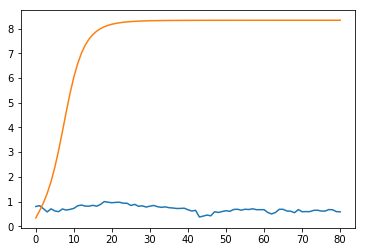

In [12]:
def plot_results_multiple(predicted_data, true_data):
    plt.plot(true_data)
    plt.plot(predicted_data)
    plt.show()
    
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
   
    for i in range(length): 
        predicted = []        
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predictions = predict_sequences_multiple(model, testX[0], len(testX))

plot_results_multiple(predictions, testY)